In [6]:
pip install pingouin

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin
import warnings
warnings.filterwarnings("ignore")
sns.set_palette('rocket')

In [58]:

df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089')
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [59]:
display(df.head())
display(df.info())

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


None

# OBSERVATION
This data seems to have no null values.
Here Holiday data is included in the workingday column.
Casual and Registered is summed to counts column.
Also, temp and atemp gives us the similar info.
So we can ignore these columns - holiday, casual, registered, temp.
We can do hypothesis testing to see which factor has effects to Counts. Let's consider 95% confidence interval. But first let's view the distributions.

## Columns Distribution

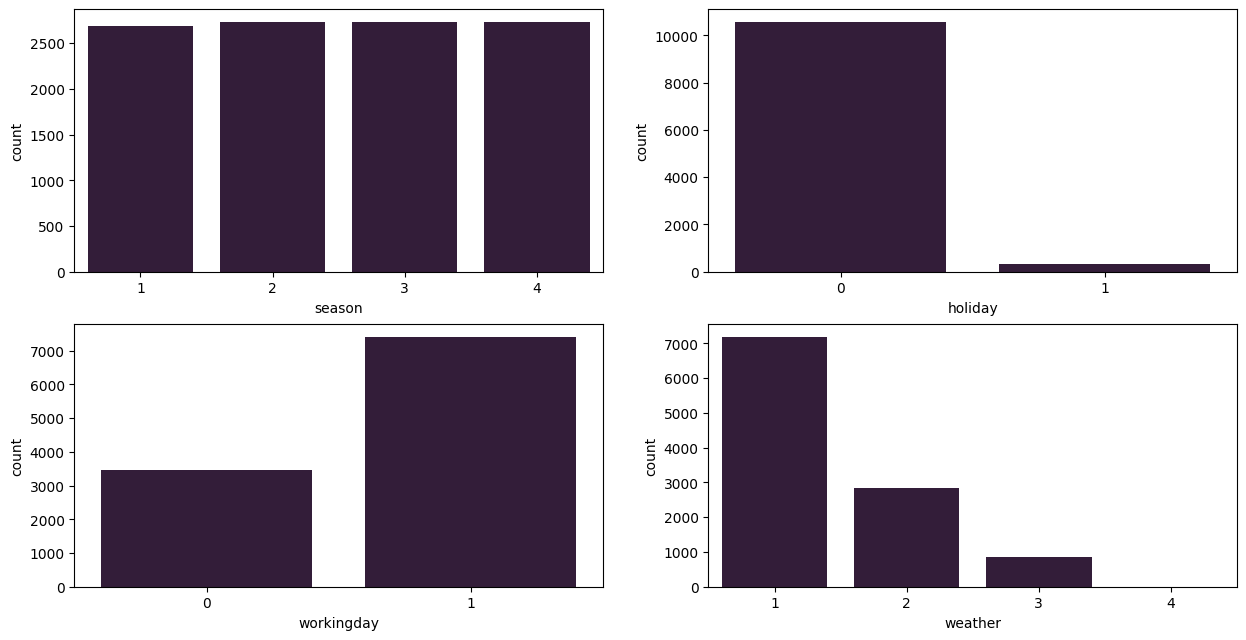

In [60]:
cat=["season","holiday","workingday","weather"]
fig,axis=plt.subplots(nrows=2,ncols=2,figsize=(15,7.5))

index=0
for row in range(2):
  for col in range(2):
    sns.countplot(x=df[cat[index]],ax=axis[row,col])
    index +=1
plt.show()

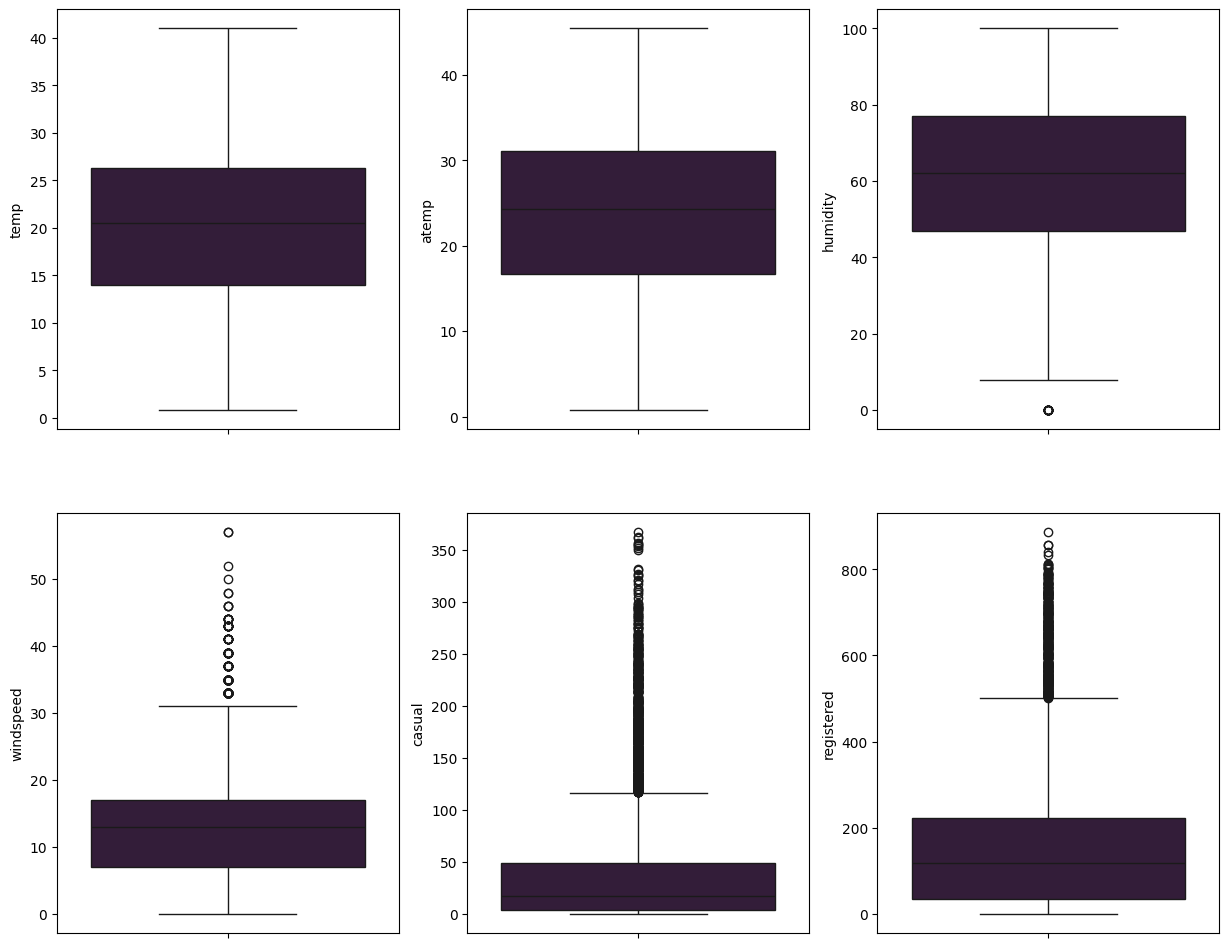

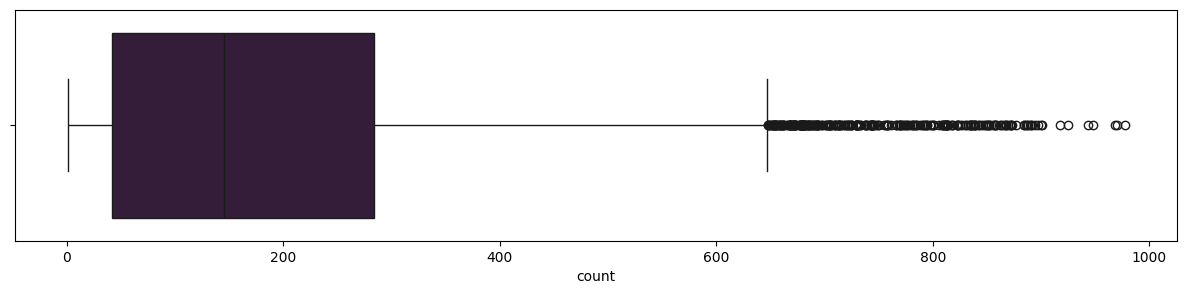

In [61]:
columns_cat=['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered','count']

fig,axis=plt.subplots(nrows=2,ncols=3,figsize=(15,12))

index=0
for row in range(2):
  for col in range(3):
    sns.boxplot(y=df[columns_cat[index]],ax=axis[row,col])
    index += 1
plt.show()

fig,axis=plt.subplots(nrows=1,ncols=1,figsize=(15,3))
sns.boxplot(x=df[columns_cat[-1]])
plt.show()

# OBSERVATION

The seasons seem to be balanced throughout the dataset.  There are twice as many workdays as weekends, which fits with typical cycling patterns. The weather is usually clear, though mist or snow sometimes occur.  Bad weather is infrequent, understandably impacting bike usage. The 'atemp' and 'humidity' columns follow a normal distribution. However, 'windspeed' and 'count' are right-skewed, with a significant number of outliers. We should clean up the data by removing those outlier rows.




In [62]:
Q1 = df['count'].quantile(0.25)
Q3 = df['count'].quantile(0.75)
IQR = Q3 - Q1
df=df[(df['count']>Q1 - (1.5*IQR)) & (df['count']<Q3 + (1.5*IQR))].copy()
df.shape

(10583, 12)

# Correlation

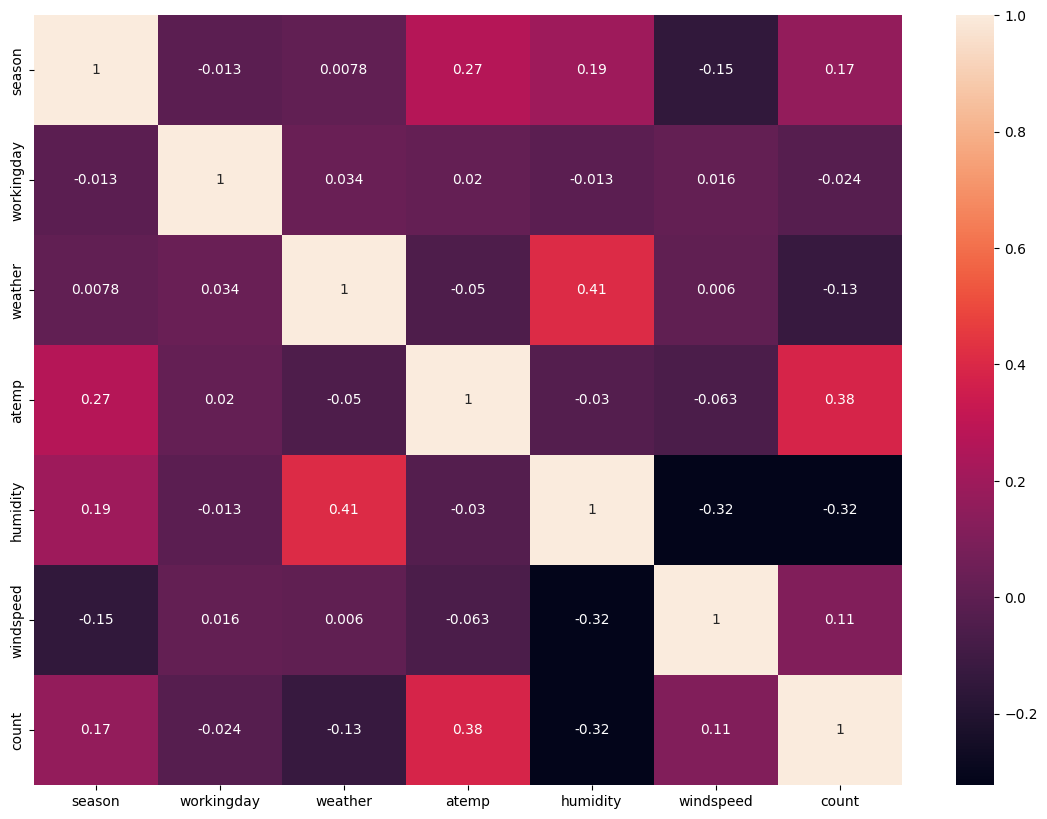

In [63]:
fig, ax = plt.subplots(figsize=(14,10))
df_corr = sns.heatmap(df.drop(columns=['holiday','casual','registered','temp', 'datetime']).corr(), annot=True,ax=ax)

# OBSERVATION

It appears that people tend to bike more frequently when the weather is warm and dry. This is reflected in the 'count' column, which has a slight positive correlation with 'atemp' and a slight negative correlation with 'humidity (coefficients around 30-40%).  This pattern seems logical and fits with expected behavior.

# Data Exploration

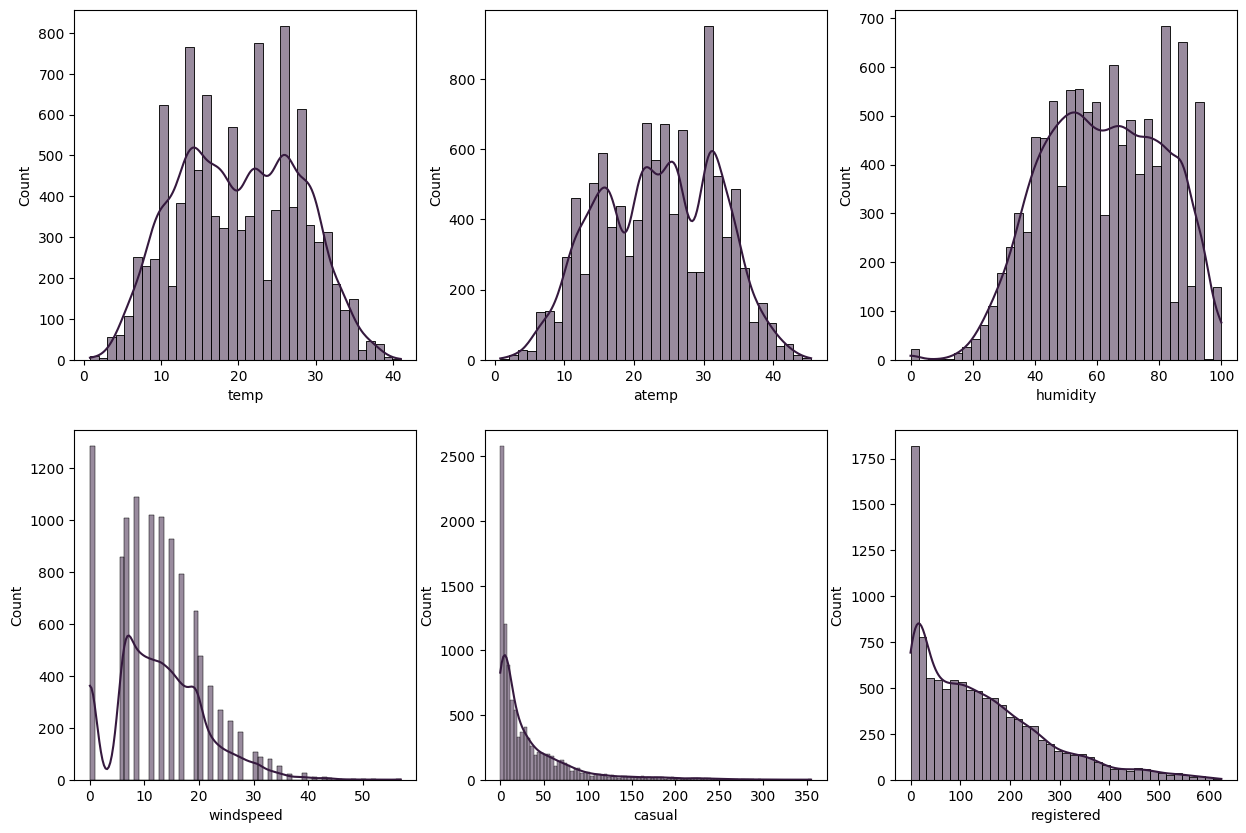

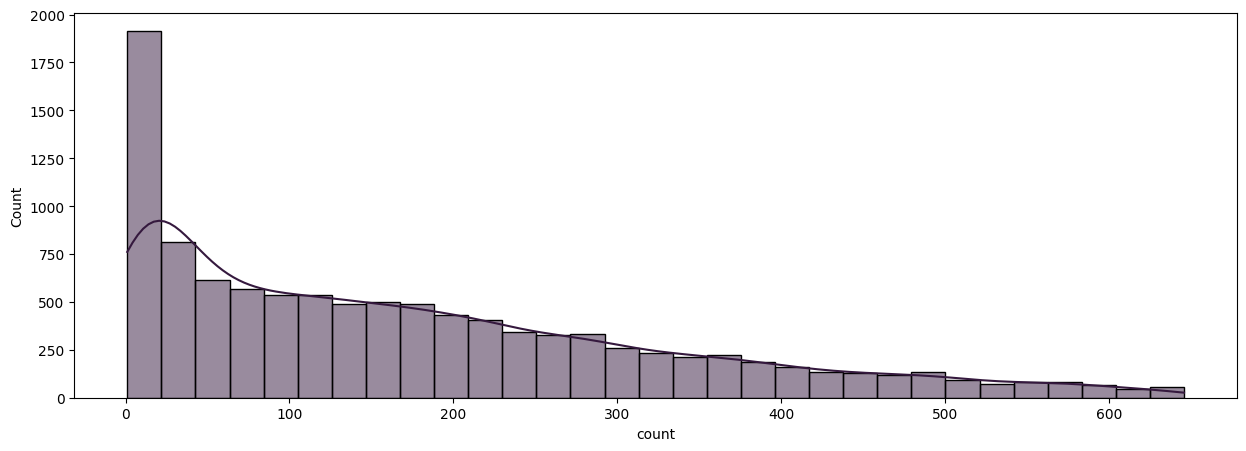

In [64]:
columns_cat=['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered','count']

fig,axis=plt.subplots(nrows=2,ncols=3,figsize=(15,10))

index=0
for row in range(2):
  for col in range(3):
    sns.histplot(df[columns_cat[index]],ax=axis[row,col],kde=True)
    index += 1
plt.show()

fig,axis=plt.subplots(nrows=1,ncols=1,figsize=(15,5))
sns.histplot(df[columns_cat[-1]], kde=True)
plt.show()

In [65]:
df["workingday"].value_counts(normalize=True)*100


workingday
1    67.665123
0    32.334877
Name: proportion, dtype: float64

In [66]:
df["weather"].value_counts(normalize=True)*100


weather
1    65.784749
2    26.174053
3     8.031749
4     0.009449
Name: proportion, dtype: float64

In [67]:
df["season"].value_counts(normalize=True)*100


season
1    25.229141
4    25.172446
2    24.879524
3    24.718889
Name: proportion, dtype: float64

In [68]:
df_11=pd.crosstab(df["workingday"],df["weather"])
df_11

weather,1,2,3,4
workingday,,,,
0,2307,891,224,0
1,4655,1879,626,1


In [69]:
df.groupby(["workingday"])[["casual","registered","count"]].sum()

,casual,registered,count
workingday,,,
0,191607,427657,619264
1,167284,1071652,1238936


In [70]:
df.groupby(["weather"])[["casual","registered","count"]].sum()

,casual,registered,count
weather,,,
1,262440,1040367,1302807
2,82083,378063,460146
3,14362,80721,95083
4,6,158,164


In [71]:
df.groupby(["season"])[["casual","registered","count"]].sum()

,casual,registered,count
season,,,
1,38740,262423,301163
2,117824,397332,515156
3,130041,420586,550627
4,72286,418968,491254


<Axes: xlabel='workingday', ylabel='count'>

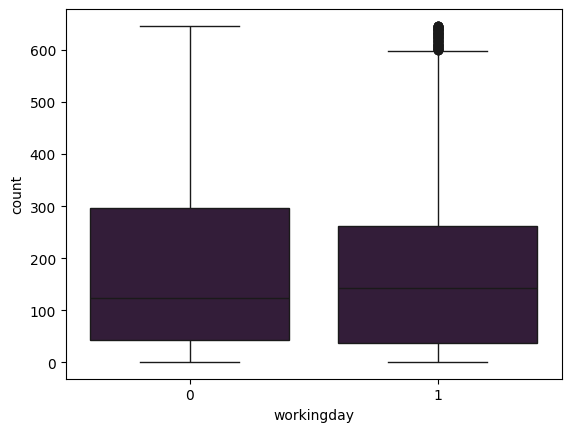

In [72]:
sns.boxplot(data=df,x=df["workingday"],y=df["count"])

<Axes: xlabel='weather', ylabel='count'>

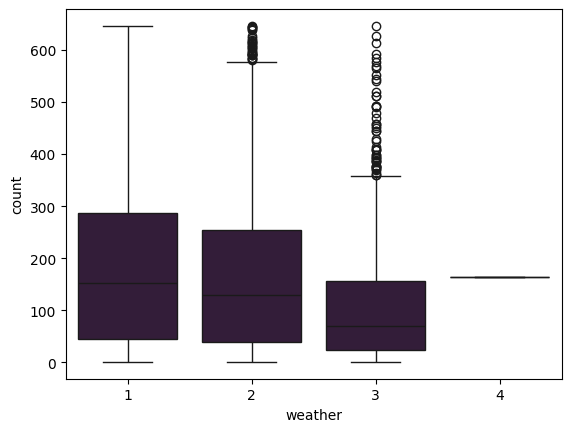

In [73]:
sns.boxplot(data=df,x=df["weather"],y=df["count"])

<Axes: xlabel='season', ylabel='count'>

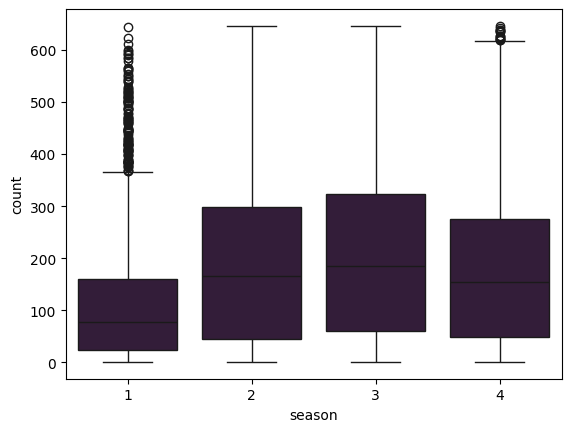

In [74]:
sns.boxplot(data=df,x=df["season"],y=df["count"])

# Hypothesis Testing

# HT-1) Do people rent more or fewer electric cycles on workdays compared to weekends/holidays?

Ho (Null Hypothesis): There's no difference in bike rentals between workdays and non-workdays.  
Ha (Alternative Hypothesis): Workdays and non-workdays have different bike rental rates.

Reasoning for Test Choice:
We're comparing numerical data (bike rentals) across two categorical groups (workday vs. non-workday). This makes an independent samples t-test appropriate. This test will help us determine if the difference in rental numbers between the two categories is statistically significant.

Significance Level:
We've set our significance level (alpha) to 0.05. This means we're willing to accept a 5% chance of incorrectly rejecting the null hypothesis (concluding there's a difference when there actually isn't).


In [75]:
from scipy.stats import ttest_ind
test1=df[df["workingday"]==1][["count"]]
test2=df[df["workingday"]==0][["count"]]

ttest,pvalue=ttest_ind(test1,test2,equal_var=False,alternative="greater")
alpha=0.05

print(alpha,ttest,pvalue)


if pvalue<alpha:
  print("Result : Reject null hypothesis, Working day has effect on bike rentals")
else:
  print("Result : Fail to reject null hypothesis, Working day has no effect on bike rentals")

0.05 [-2.38947299] [0.99154915]
Result : Fail to reject null hypothesis, Working day has no effect on bike rentals


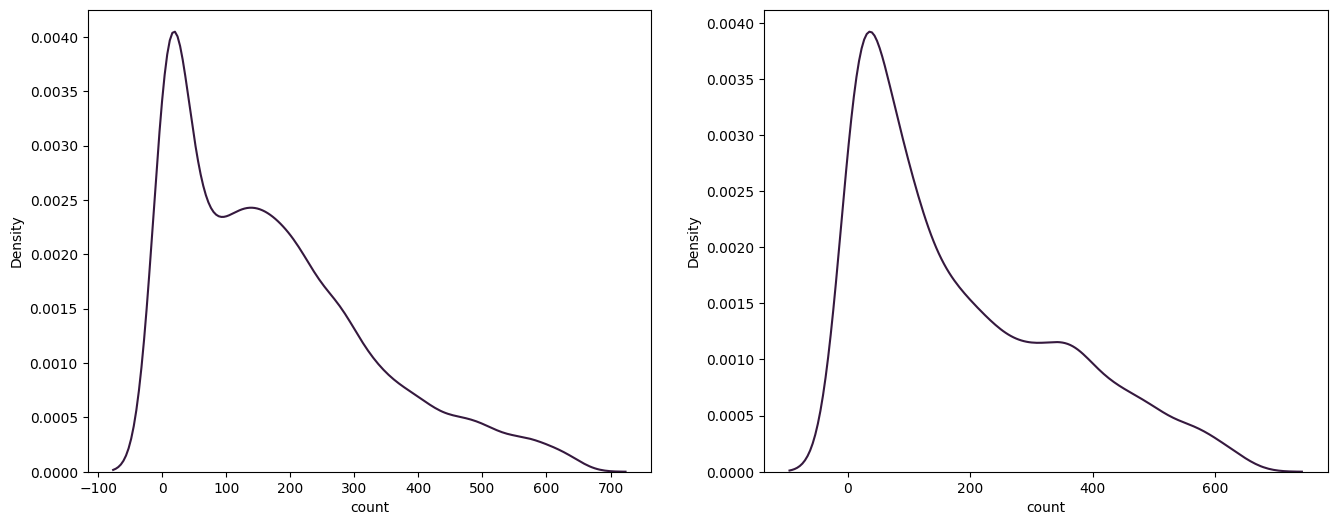

In [76]:
working_day = df.loc[df['workingday']==1,'count']
non_working_day = df.loc[df['workingday']==0,'count']

fig, ax = plt.subplots(1,2,figsize=(16,6))
working_day_plot = sns.kdeplot(working_day,ax=ax[0])
non_working_day_plot = sns.kdeplot(non_working_day,ax=ax[1])

# HT-2) Do seasons impact the rental frequency of electric cycles?


Ho (Null Hypothesis): Weather conditions do not affect bike rental rates.  
Ha (Alternative Hypothesis): Weather conditions have an influence on bike rental rates.

Test: Because we're comparing numerical data (rental rates) across multiple weather categories, ANOVA (Analysis of Variance) is an appropriate statistical test.

Significance Level: We'll use a standard alpha level of 0.05.

Assumptions: Before running ANOVA, we need to verify:

   Normality: Data within each weather category should be approximately normally
   distributed (checked with Shapiro-Wilk, Q-Q plots, or Kolmogorov-Smirnov test).
   Equal Variances: The spread of data across different weather categories should be roughly similar (checked with Levene's test).

In [77]:
df.weather.value_counts()

weather
1    6962
2    2770
3     850
4       1
Name: count, dtype: int64

In [78]:
df_new=df[~(df["weather"]==4)]

In [79]:
test_1=df_new[df_new["weather"]==1][["count"]]
test_2=df_new[df_new["weather"]==2][["count"]]
test_3=df_new[df_new["weather"]==3][["count"]]

For normality test , we are taking shapiros test

In [80]:
from scipy.stats import shapiro
sstat,pvalue=shapiro(df_new["count"].sample(4999))
print(pvalue)

if pvalue<0.05:
  print("its gaussian(normal distribution)")
else:
  print("Its not gaussian(not normally distributed)")

0.0
its gaussian(normal distribution)


Normality test kstest

In [81]:
from scipy.stats import kstest
kstat,pvalue=kstest(test_1["count"],test_2["count"],test_3["count"])

print(pvalue)

if pvalue<0.05:
  print("its gaussian(normal distribution)")
else:
  print("Its not gaussian(not normally distributed)")

1.9541397976486484e-06
its gaussian(normal distribution)


Normality test qq plot, this output shows its not gaussian, since the percentile of sample is not intact with line of gaussian distribution.

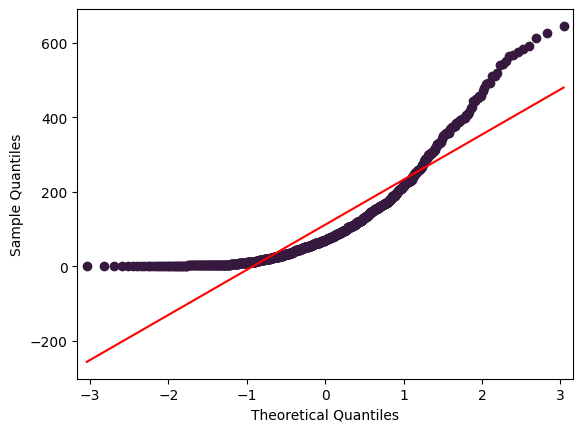

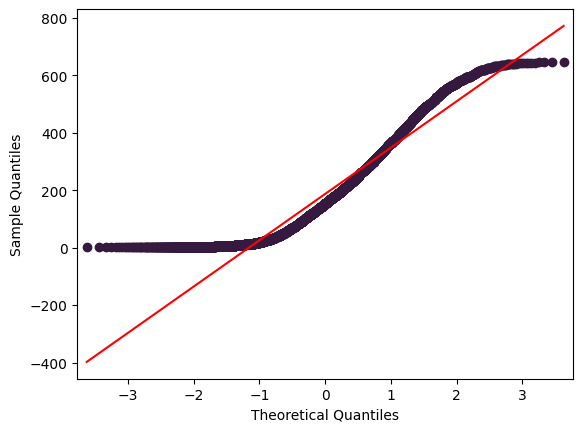

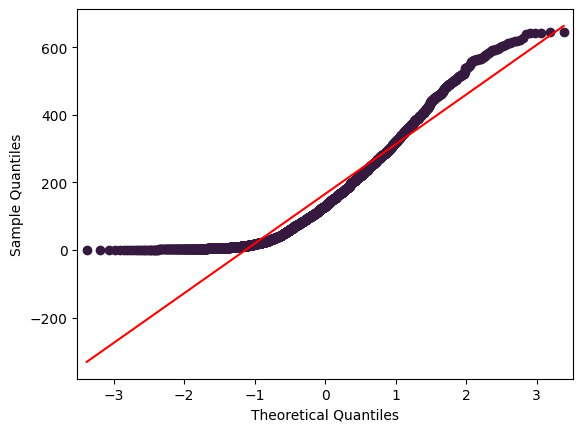

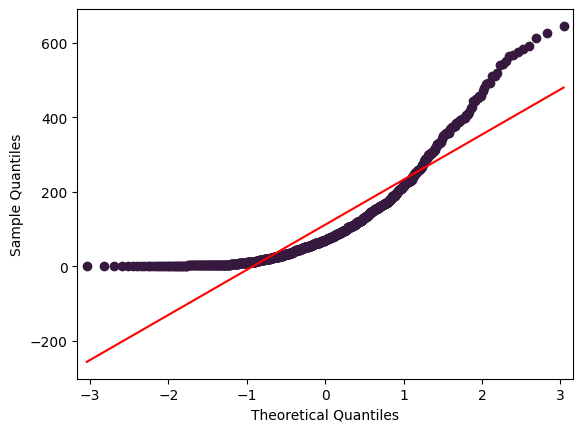

In [82]:
from statsmodels.graphics.gofplots import qqplot
qqplot(test_1["count"],line="s")
qqplot(test_2["count"],line="s")
qqplot(test_3["count"],line="s")

Equal variance test - Levenes test    
Ho: variance is equal    
Ha: variance is not equal

In [83]:
from scipy.stats import levene

lstat,pvalue=levene(test_1["count"],test_2["count"],test_3["count"])

print(pvalue)

if pvalue<0.05:
  print("reject Ho,variance is not equal ")
else:
  print("fail to reject Ho,variance is equal ")

4.0910836644825954e-38
reject Ho,variance is not equal 


In [84]:
from scipy.stats import f_oneway


ftest,pvalue=f_oneway(test_1,test_2,test_3)
alpha=0.05

print(alpha,ftest,pvalue)

if pvalue<alpha:
  print("Result : Reject null hypothesis, Weather has effect on bike rentals")
else:
  print("Result : Fail to reject null hypothesis, Weather has no effect on bike rentals")

0.05 [96.56793301] [2.74987319e-42]
Result : Reject null hypothesis, Weather has effect on bike rentals


<Axes: xlabel='count', ylabel='Density'>

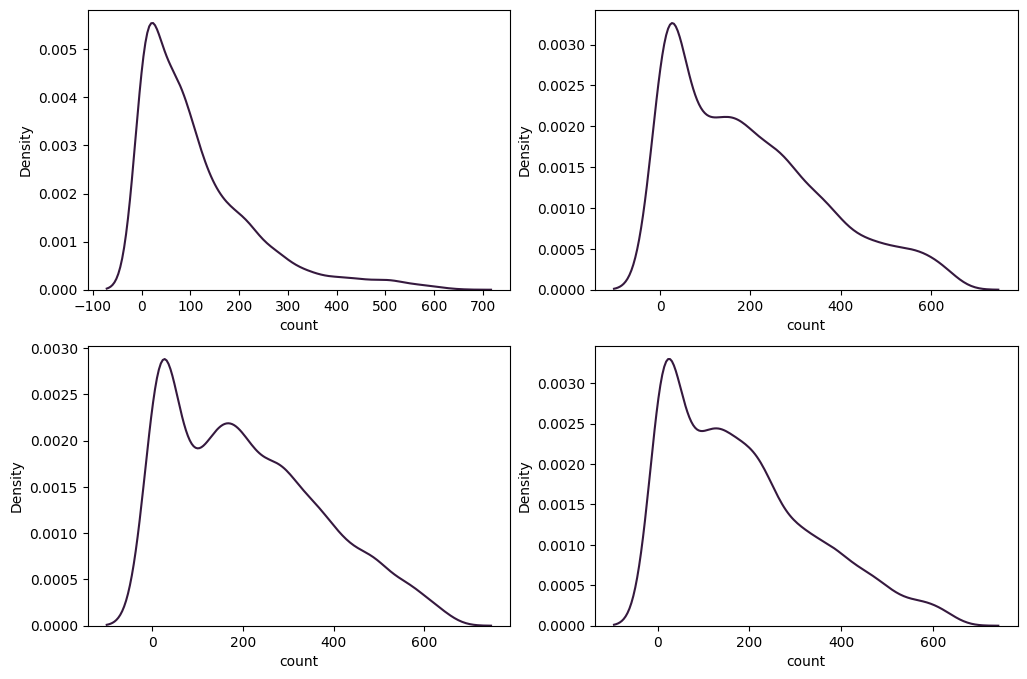

In [85]:
spring = df.loc[df['season']==1,'count']
summer = df.loc[df['season']==2,'count']
fall = df.loc[df['season']==3,'count']
winter = df.loc[df['season']==4,'count']
fig, ax = plt.subplots(2,2,figsize=(12,8))
sns.kdeplot(spring,ax=ax[0,0])
sns.kdeplot(summer,ax=ax[0,1])
sns.kdeplot(fall,ax=ax[1,0])
sns.kdeplot(winter,ax=ax[1,1])

In [86]:
pingouin.kruskal(data=df,dv='count',between='season')

,Source,ddof1,H,p-unc
Kruskal,season,3,619.367982,6.376253e-134


([<matplotlib.axis.XTick at 0x7b1452cf4520>,
 [Text(0, 0, 'spring'),
  Text(1, 0, 'summer'),
  Text(2, 0, 'fall'),
  Text(3, 0, 'winter')])

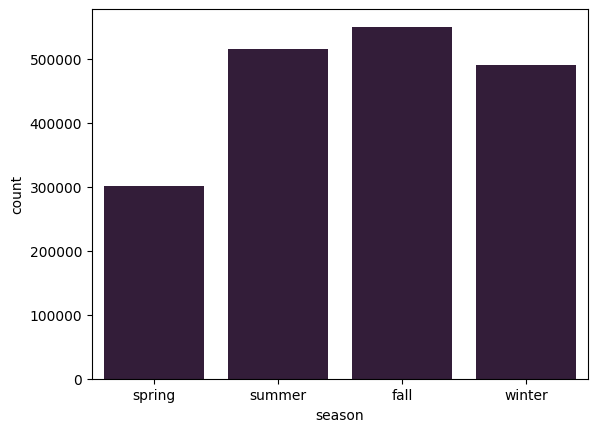

In [87]:
season_grouped = pd.DataFrame(df.groupby('season')['count'].sum())
sns.barplot(data=season_grouped,x=season_grouped.index,y='count')
plt.xticks(range(4),['spring','summer','fall','winter'])

# HT-3) Do people rent more/fewer electric cycles depending on the weather?

Ho (Null Hypothesis): Season doesn't affect how many bikes are rented.    
Ha (Alternative Hypothesis): Season does influence bike rental rates.    
Test:  ANOVA (Analysis of Variance) is the right test because we're comparing rental numbers (numerical data) across different seasons (categories).

Significance Level: We'll use a standard significance level of 0.05.

Important Note: Before doing ANOVA, we need to check:

Normality: The rental data for each season should roughly follow a normal distribution (we can use tests like Shapiro-Wilk, Q-Q plots, or Kolmogorov-Smirnov).    
Equal Variances: The spread of rental data shouldn't be wildly different between seasons (Levene's test will check this).

In [88]:
df_new.season.value_counts()

season
1    2669
4    2664
2    2633
3    2616
Name: count, dtype: int64

In [89]:
s1=df_new[df_new["season"]==1][["count"]]
s2=df_new[df_new["season"]==2][["count"]]
s3=df_new[df_new["season"]==3][["count"]]
s4=df_new[df_new["season"]==4][["count"]]

For normality test , we are taking shapiros test.

In [90]:
from scipy.stats import shapiro
sstat,pvalue=shapiro(df_new["count"].sample(4999))
print(pvalue)

if pvalue<0.05:
  print("its gaussian(normal distribution)")
else:
  print("Its not gaussian(not normally distributed)")

0.0
its gaussian(normal distribution)


Normality test qq plot, this output shows its not gaussian, since the percentile of sample is not intact with line of gaussian distribution.

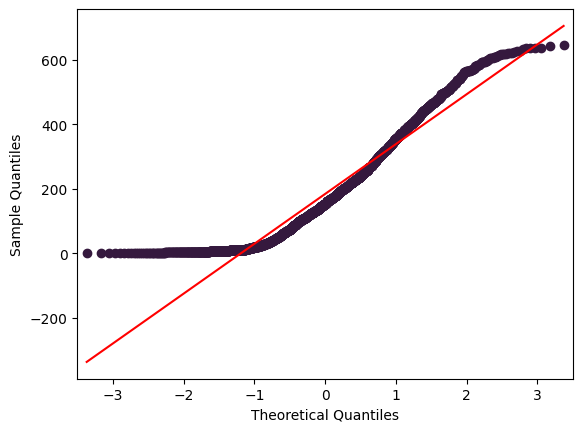

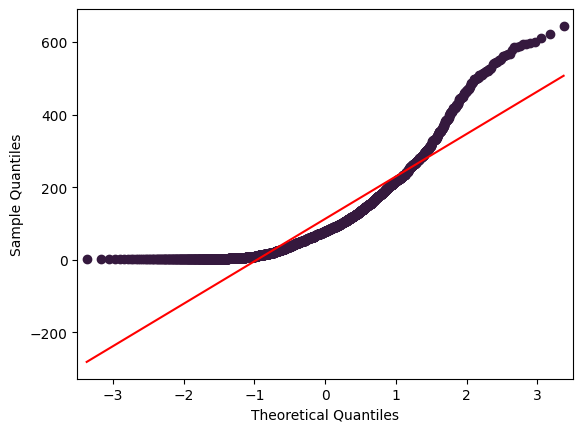

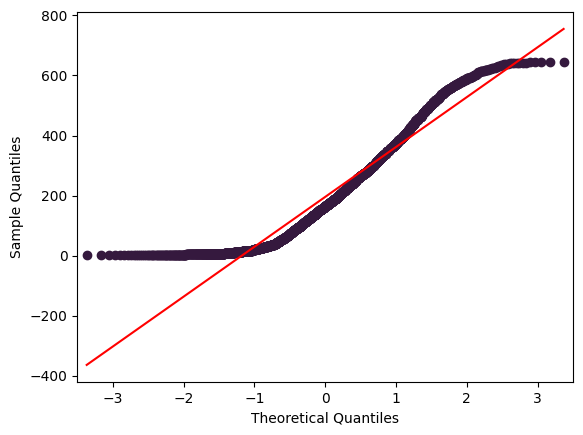

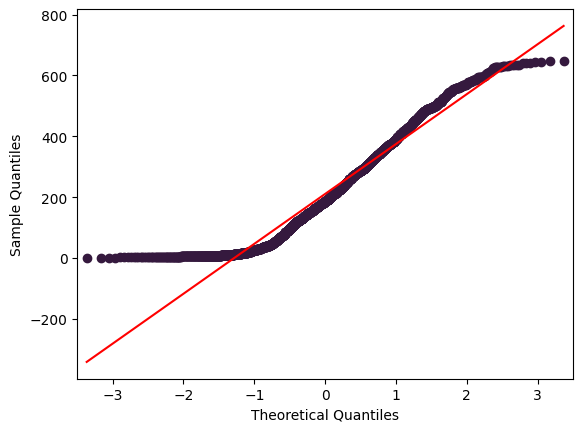

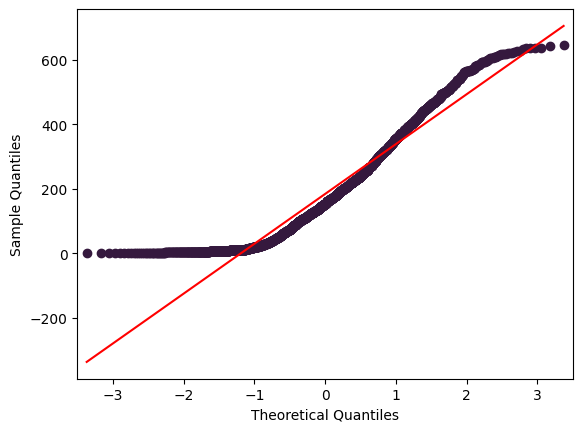

In [91]:
from statsmodels.graphics.gofplots import qqplot
qqplot(s1["count"],line="s")
qqplot(s2["count"],line="s")
qqplot(s3["count"],line="s")
qqplot(s4["count"],line="s")

 Normality test kstest.

In [92]:
from scipy.stats import kstest
kstat,pvalue=kstest(s1["count"],s2["count"],s3["count"],s4["count"])

print(pvalue)

if pvalue<0.05:
  print("its gaussian(normal distribution)")
else:
  print("Its not gaussian(not normally distributed)")

2.9843065101782075e-80
its gaussian(normal distribution)


Equal variance test - Levenes test   
Ho:variance is equal   
Ha:variance is not equal

In [93]:
from scipy.stats import levene

lstat,pvalue=levene(s1["count"],s2["count"],s3["count"],s4["count"])

print(pvalue)

if pvalue<0.05:
  print("reject Ho,variance is not equal ")
else:
  print("fail to reject Ho,variance is equal ")

2.8888914121532733e-112
reject Ho,variance is not equal 


In [94]:
from scipy.stats import f_oneway


ftest,pvalue=f_oneway(s1,s2,s3,s4)
alpha=0.05

print(alpha,ftest,pvalue)

if pvalue<alpha:
  print("Result : Reject null hypothesis, Season has effect on bike rentals")
else:
  print("Result : Fail to reject null hypothesis, Season has no effect on bike rentals")

0.05 [217.28488196] [8.6769805e-137]
Result : Reject null hypothesis, Season has effect on bike rentals


# HT-4) Do we get different weather in different seasons ?

Ho (Null Hypothesis): There is no association between weather and season.    
Ha (Alternative Hypothesis): Weather and season are related.     
Test: Since we're working with categorical data (weather types and seasons), the chi-square test is appropriate.

Significance Level: We'll use a significance level (alpha) of 0.05.

In [95]:
df_f= df_new[["season","weather","count"]]
df1=pd.crosstab(index=df_f["season"],columns=df_f["weather"],values=df_f["count"],aggfunc = 'mean').reset_index(drop=True)
df1

weather,1,2,3
0,121.780963,106.014006,61.227488
1,213.230814,175.979710,120.955157
2,218.216612,208.616580,142.989744
3,194.268720,180.733164,123.565611


In [96]:
from scipy.stats import chi2_contingency

Xistat,p_value,dof,exp_freq=chi2_contingency(df1)

print(p_value)
alpha=0.05

if pvalue<alpha:
  print("Result : Reject null hypothesis, Weather has effect on seasons")
else:
  print("Result : Fail to reject null hypothesis, Weather has no effect on seasons")

0.7968630160944015
Result : Reject null hypothesis, Weather has effect on seasons


In [102]:
expected, observed, stats=pingouin.chi2_independence(df[['season', 'weather','count']], 'season', 'weather')
stats.loc[stats['test']=='pearson']

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.0,47.165906,9.0,3.655032e-07,0.038543,0.802227


Here the P-value is 3.65e-7 which is much smaller than alpha =.05. So we can reject the null hypothesis and estabish that the weather and season column depends on each other.

[]

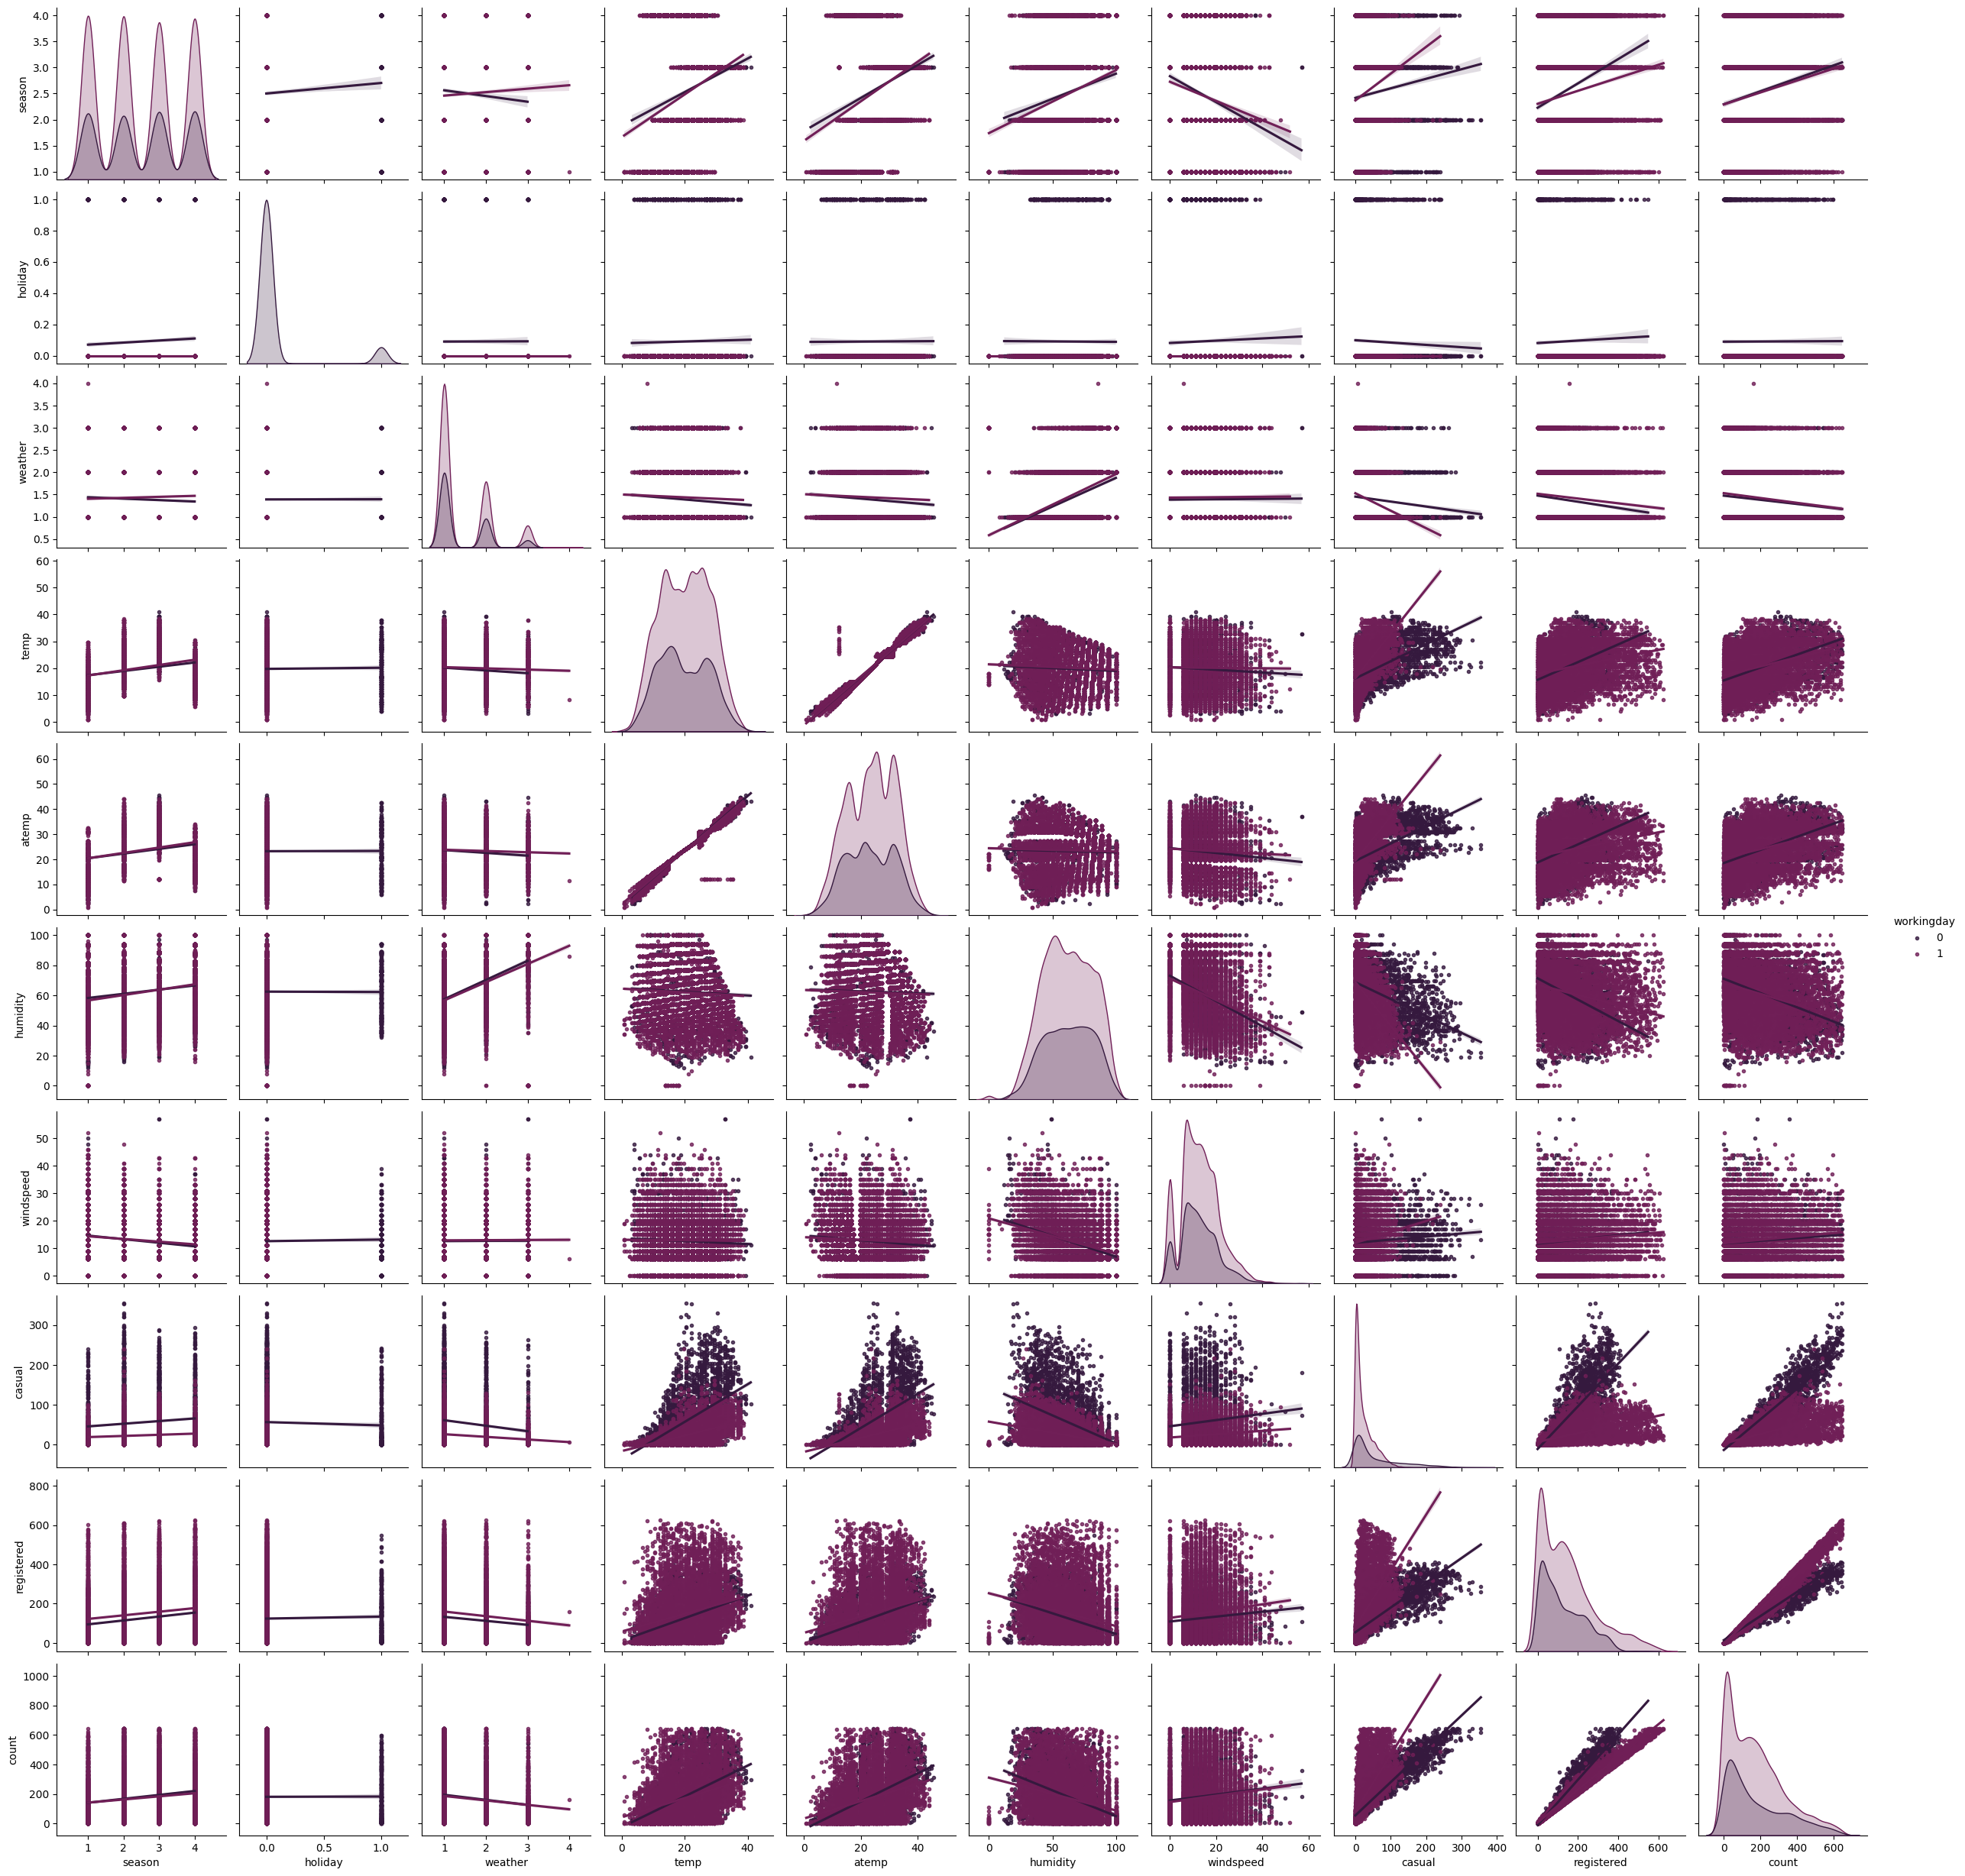

In [97]:
sns.pairplot(data = df,
             kind = 'reg',
             hue = 'workingday',
             markers = '.')
plt.plot()

In [99]:
df = df.drop(columns=['datetime'])

In [100]:
corr_data = df.corr()
corr_data

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.031530,-0.012546,0.007795,0.263840,0.270398,0.193819,-0.149305,0.102565,0.165274,0.165037
holiday,0.031530,1.000000,-0.250874,-0.007584,0.002308,-0.003088,0.001150,0.007252,0.053855,-0.010304,0.007779
workingday,-0.012546,-0.250874,1.000000,0.034063,0.024533,0.019706,-0.012550,0.015894,-0.325901,0.090976,-0.023823
weather,0.007795,-0.007584,0.034063,1.000000,-0.049709,-0.050300,0.405941,0.006002,-0.129509,-0.109637,-0.127915
temp,0.263840,0.002308,0.024533,-0.049709,1.000000,0.985885,-0.050958,-0.022109,0.468881,0.304261,0.387816
atemp,0.270398,-0.003088,0.019706,-0.050300,0.985885,1.000000,-0.030118,-0.062602,0.463878,0.301943,0.384432
humidity,0.193819,0.001150,-0.012550,0.405941,-0.050958,-0.030118,1.000000,-0.319592,-0.335204,-0.273894,-0.323054
windspeed,-0.149305,0.007252,0.015894,0.006002,-0.022109,-0.062602,-0.319592,1.000000,0.088060,0.102536,0.109715
casual,0.102565,0.053855,-0.325901,-0.129509,0.468881,0.463878,-0.335204,0.088060,1.000000,0.512966,0.716661
registered,0.165274,-0.010304,0.090976,-0.109637,0.304261,0.301943,-0.273894,0.102536,0.512966,1.000000,0.966296


[]

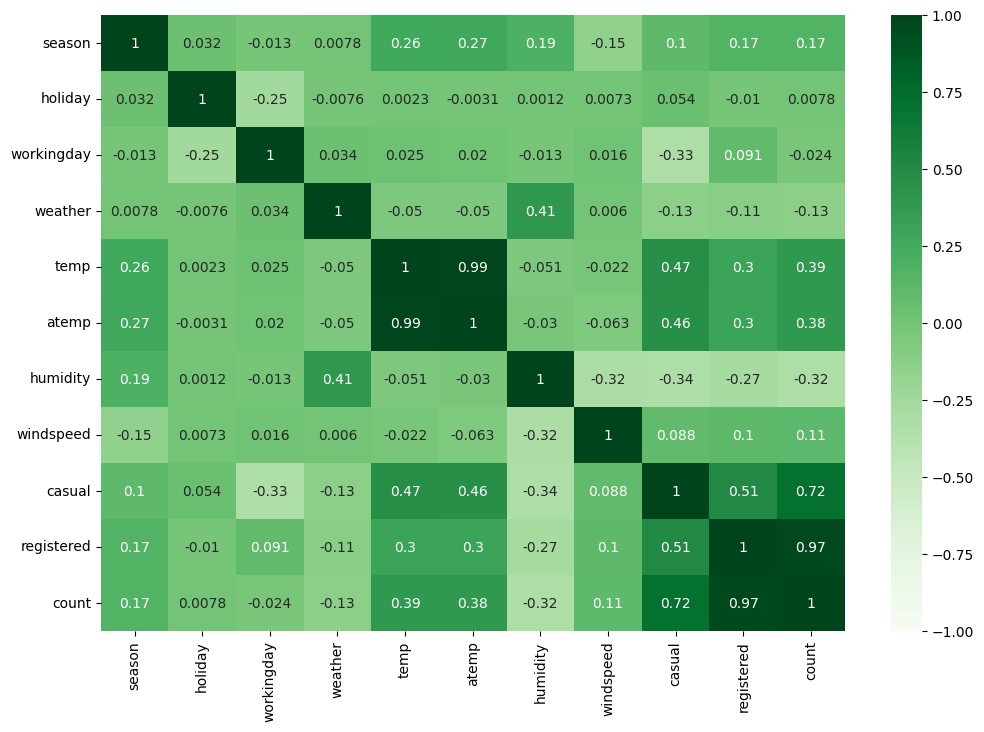

In [101]:
plt.figure(figsize = (12, 8))
sns.heatmap(data = corr_data, cmap = 'Greens', annot = True, vmin = -1, vmax = 1)
plt.plot()

- Very Strong Correlation: Temperature (both 'atemp' and 'temp') is extremely highly correlated with rental counts ('count' and 'registered').
- No Strong Correlations: No other column pairs show a strong positive or negative correlation (between 0.7 and 0.9).
- Moderate Correlations: Casual rentals ('casual') have a moderate positive correlation with both total rentals ('count') and registered rentals ('registered').
- Weak Correlations: Total rentals ('count') show a weak positive correlation with temperature ('temp' and 'atemp').
Casual rentals ('casual') have a weak positive correlation with apparent temperature ('atemp').
- Negligible Correlations: All other combinations of columns show insignificant relationships.

# Insights

- Data timeframe: The dataset covers 718 days and 23 hours, starting on January 1st, 2011, and ending on December 19th, 2012.

- User breakdown: Roughly 19% of bike rentals are from casual users, and 81% are from registered users.

- Yearly growth: Average hourly bike rentals increased from 144 in 2011 to 239 in 2012, showing a 65.41% annual growth rate.

- Seasonal trends: Rental demand peaks in spring and summer, declines slightly in fall, and drops further in winter. January, February, and March have the lowest average hourly rental counts.

- Daily patterns: Rentals are lowest early morning, increase sharply later in the morning, peak in the afternoon, and gradually decline through the evening and night.

- Temperature: Over 80% of the time, temperatures are below 28 degrees Celsius.

- Humidity: Humidity levels exceed 40 over 80% of the time, indicating generally humid to very humid conditions.

- Windspeed: Windspeeds are below 20 in over 85% of the data.

- Weather and rentals: Clear and cloudy weather see the most rentals, followed by mist and rain. Extreme weather records are rare.

- Workdays vs. non-workdays: Average hourly bike rentals are statistically similar on both working and non-working days.

Statistical Findings:

- Season and weather significantly impact the hourly rental count.
- Rentals differ significantly across different weather conditions.
- There's no significant dependency between weathers 1, 2, 3 and season based on the average hourly rental count.
- Rental numbers vary significantly between seasons.

# Recommendations


- Harness Seasonal Trends:  Focus marketing on spring and summer, the peak rental seasons. Offer seasonal discounts or packages to maximize demand.

- Implement Dynamic Pricing:  Charge less during off-peak hours and more during popular times to balance out bike usage.

- Weather-Smart Promotions:  Run promotions specifically tied to clear and cloudy days since these see the most rentals.

Target User Groups:

- Registered Users: Loyalty programs, special offers, and personalized communication.
- Casual Users: Highlight ease of use and the benefits of occasional rentals.
- Manage Inventory Strategically: Increase inventory before peak months, decrease it during the slowest periods (like January-March).

- Gather Extreme Weather Data: Improve data tracking during unusual weather to better understand customer behavior in those conditions.

- Prioritize Customer Comfort: Provide amenities (umbrellas, water bottles, etc.) to make renting more appealing in the typical weather conditions.

- Partner with Weather Apps: Share real-time weather updates with potential customers to highlight good biking conditions and match weather preferences.

- Seasonal Maintenance is Key: Thorough pre-season bike checks are essential. Regular servicing throughout the year prevents issues and boosts customer satisfaction.

- Customer Feedback is Invaluable: Reviews and feedback let you pinpoint areas for improvement and cater services better to customers.

- Social Media Power:  Use captivating visuals, customer stories, and interactive content to promote rentals. Targeted ads reach the right audiences.

- Environmental Day Discounts: Offer special deals on Zero Emissions Day, Earth Day, etc., to attract new users aligned with Yulu's sustainability mission.